In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv(r'C:\credit card\data\creditdata.csv')

In [6]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income,Card_Category,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,75171,Blue,39,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,25686,Blue,44,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,109348,Blue,36,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,39617,Blue,34,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,61236,Blue,21,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,47737,Blue,40,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,51542,Blue,25,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,28850,Blue,36,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,59028,Blue,36,5281.0,0,5281.0,8395,62,0.000


In [7]:
df['Income'].describe()

count     10127.000000
mean      58356.108818
std       33142.044336
min       20000.000000
25%       32229.500000
50%       48036.000000
75%       75777.500000
max      149971.000000
Name: Income, dtype: float64

In [8]:
def income_category(row):

  if row['Income'] <= 40000:
    return 'Low Income'
  elif (row['Income'] > 40000) and (row['Income'] <= 75000):
    return 'Medium Income'
  elif row['Income'] > 75000:
    return 'High Income'
  else: return 'Not enough data'

In [9]:
def income_category(row):

  if row['Income'] <= 58000:
    return 'Low Income'
  else: return 'High Income'

In [10]:
df['Income_Category'] = df.apply(income_category, axis=1)

In [11]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income,Card_Category,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Income_Category
0,768805383,Existing Customer,45,M,3,High School,Married,75171,Blue,39,12691.0,777,11914.0,1144,42,0.061,High Income
1,818770008,Existing Customer,49,F,5,Graduate,Single,25686,Blue,44,8256.0,864,7392.0,1291,33,0.105,Low Income
2,713982108,Existing Customer,51,M,3,Graduate,Married,109348,Blue,36,3418.0,0,3418.0,1887,20,0.000,High Income
3,769911858,Existing Customer,40,F,4,High School,Unknown,39617,Blue,34,3313.0,2517,796.0,1171,20,0.760,Low Income
4,709106358,Existing Customer,40,M,3,Uneducated,Married,61236,Blue,21,4716.0,0,4716.0,816,28,0.000,High Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,47737,Blue,40,4003.0,1851,2152.0,15476,117,0.462,Low Income
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,51542,Blue,25,4277.0,2186,2091.0,8764,69,0.511,Low Income
10124,716506083,Attrited Customer,44,F,1,High School,Married,28850,Blue,36,5409.0,0,5409.0,10291,60,0.000,Low Income
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,59028,Blue,36,5281.0,0,5281.0,8395,62,0.000,High Income


In [12]:
df['Income_Category'].value_counts()

Low Income     6236
High Income    3891
Name: Income_Category, dtype: int64

In [13]:
df.groupby('Income_Category').agg({'Avg_Utilization_Ratio':['mean'], 
                         'Total_Trans_Ct':['mean']}) 

,Avg_Utilization_Ratio,Total_Trans_Ct
,mean,mean
Income_Category,,
High Income,0.178895,63.236957
Low Income,0.334792,65.870590


<AxesSubplot:xlabel='Income_Category'>

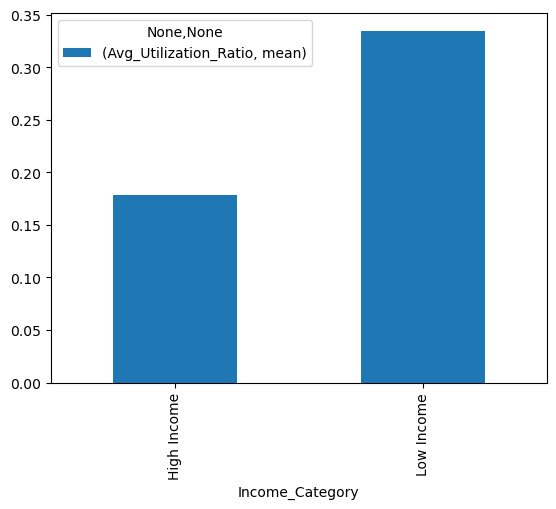

In [14]:
df.groupby('Income_Category').agg({'Avg_Utilization_Ratio':['mean'] 
                         }).plot.bar() 

In [15]:
df['Months_on_book'].describe()

count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

In [16]:
def months_on_book(row):

  if row['Months_on_book'] <= 33:
    return 'Low'
  elif (row['Months_on_book'] > 33) and (row['Months_on_book'] <= 38):
    return 'Medium'
  elif row['Months_on_book'] > 38:
    return 'High'
  else: return 'Not enough data'

In [17]:
df['Duration_Category'] = df.apply(months_on_book, axis=1)

In [18]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income,Card_Category,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Income_Category,Duration_Category
0,768805383,Existing Customer,45,M,3,High School,Married,75171,Blue,39,12691.0,777,11914.0,1144,42,0.061,High Income,High
1,818770008,Existing Customer,49,F,5,Graduate,Single,25686,Blue,44,8256.0,864,7392.0,1291,33,0.105,Low Income,High
2,713982108,Existing Customer,51,M,3,Graduate,Married,109348,Blue,36,3418.0,0,3418.0,1887,20,0.000,High Income,Medium
3,769911858,Existing Customer,40,F,4,High School,Unknown,39617,Blue,34,3313.0,2517,796.0,1171,20,0.760,Low Income,Medium
4,709106358,Existing Customer,40,M,3,Uneducated,Married,61236,Blue,21,4716.0,0,4716.0,816,28,0.000,High Income,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,47737,Blue,40,4003.0,1851,2152.0,15476,117,0.462,Low Income,High
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,51542,Blue,25,4277.0,2186,2091.0,8764,69,0.511,Low Income,Low
10124,716506083,Attrited Customer,44,F,1,High School,Married,28850,Blue,36,5409.0,0,5409.0,10291,60,0.000,Low Income,Medium
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,59028,Blue,36,5281.0,0,5281.0,8395,62,0.000,High Income,Medium


In [19]:
df['Duration_Category'].value_counts()

Medium    3838
High      3157
Low       3132
Name: Duration_Category, dtype: int64

<AxesSubplot:xlabel='Card_Category'>

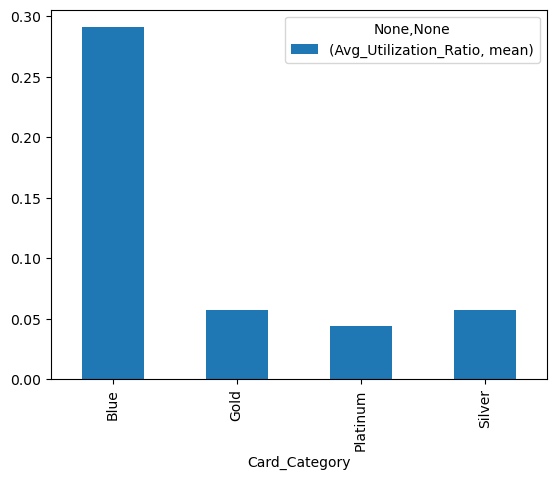

In [20]:
df.groupby('Card_Category').agg({'Avg_Utilization_Ratio':['mean'] 
                         }).plot.bar() 

<AxesSubplot:xlabel='Gender'>

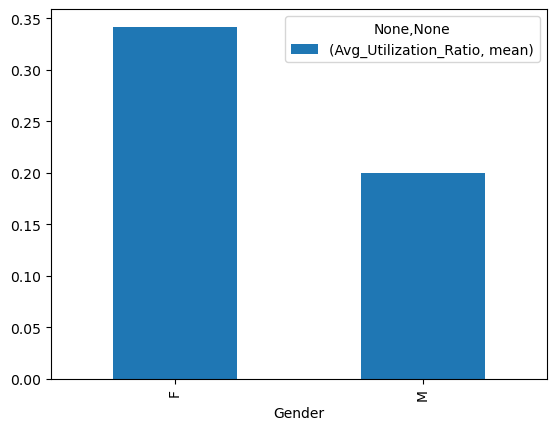

In [21]:
df.groupby('Gender').agg({'Avg_Utilization_Ratio':['mean'] 
                         }).plot.bar() 

In [ ]:
# Predict Credit Limit

In [22]:
X = df[['Income', 'Avg_Utilization_Ratio']]
y = df['Credit_Limit']

In [23]:
from sklearn import linear_model

In [24]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [25]:
vpredictedCO2 = regr.predict([[75000, 0.453]])

C:\Users\odarc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
print(vpredictedCO2)

[8522.36914097]
